### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-05 12:44:27,630	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [2]:
n = 10
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=10)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 48 (seed=2768625956, Sun Feb  5 12:44:28 2023)


In [3]:
trainer.train(1000, 'centered2')

         iter : 1
    mean_eval : -366.0207824707031
pop_best_eval : -14.801068305969238
  median_eval : -325.1225280761719
    best_eval : -14.801068305969238
   worst_eval : -892.8531494140625

         iter : 2
    mean_eval : -370.5067443847656
pop_best_eval : -1.4056053161621094
  median_eval : -251.16790771484375
    best_eval : -1.4056053161621094
   worst_eval : -1719.1710205078125

         iter : 3
    mean_eval : -231.654541015625
pop_best_eval : -3.8548009395599365
  median_eval : -248.74859619140625
    best_eval : -1.4056053161621094
   worst_eval : -1719.1710205078125

         iter : 4
    mean_eval : -140.42857360839844
pop_best_eval : 9.58651065826416
  median_eval : -37.52429962158203
    best_eval : 9.58651065826416
   worst_eval : -1719.1710205078125

         iter : 5
    mean_eval : -166.8668670654297
pop_best_eval : 4.1981353759765625
  median_eval : -72.84601593017578
    best_eval : 9.58651065826416
   worst_eval : -1719.1710205078125

         iter : 6
    me

In [4]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [5]:
network = trainer.get_trained_network()

#### Visualize trained network

In [6]:
organism = generate_organism(10, device)
graph = organism.toGraph()
visualizer = Visualizer()

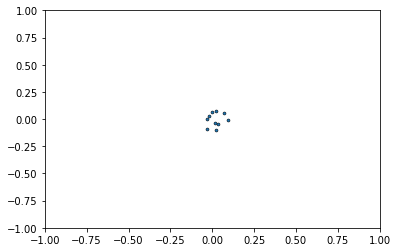

In [7]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim)

In [8]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim)

In [9]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>